# Analysis of the City Dataset

We will explore some concepts of the statistical bootstrapping with basic examples.

In [1]:
using Bootstrap

In [2]:
srand(42);

## City Dataset

Let's have a look at the *city* dataset. This measured the population (in thousands of inhabitants) of major US cities in 1920 (column `U`) and 1930 (column `X`).

In [3]:
using DataFrames
using Bootstrap.Datasets

In [4]:
city

,U,X
1,138,143
2,93,104
3,61,69
4,179,260
5,48,75
6,37,63
7,29,50
8,23,48
9,30,111
10,2,50


We want to estimate the relative change of the population. An obvious approach for this is to compute the ratios of the average population between the two time points.

In [5]:
city_ratio(df::AbstractDataFrame) = mean(df[:,:X]) ./ mean(df[:,:U])

city_ratio (generic function with 1 method)

The point estimate yields a relative change of ~1.52. We will use different bootstrap approaches to compute confidence intervals for the point estimate.

In [6]:
city_ratio(city)

1.5203125

## Bootstrap Estimates of Relative Growth

Here, we will start with three commonly used bootstrapping techniques: The ordinary, the first-order balanced and the exact bootstrap.

In [7]:
bs1 = bootstrap(city, city_ratio, BasicSampling(10000))

Bootstrap Sampling
  Estimates:
    │ Var │ Estimate │ Bias      │ StdError │
    ├─────┼──────────┼───────────┼──────────┤
    │ 1   │ 1.52031  │ 0.0385926 │ 0.219192 │
  Sampling: BasicSampling
  Samples:  10000
  Data:     DataFrames.DataFrame: { 10 × 2 }


In [8]:
bs2 = bootstrap(city, city_ratio, BalancedSampling(10000))

Bootstrap Sampling
  Estimates:
    │ Var │ Estimate │ Bias      │ StdError │
    ├─────┼──────────┼───────────┼──────────┤
    │ 1   │ 1.52031  │ 0.0386018 │ 0.21915  │
  Sampling: BalancedSampling
  Samples:  10000
  Data:     DataFrames.DataFrame: { 10 × 2 }


In [9]:
bs3 = bootstrap(city, city_ratio, ExactSampling())

Bootstrap Sampling
  Estimates:
    │ Var │ Estimate │ Bias      │ StdError │
    ├─────┼──────────┼───────────┼──────────┤
    │ 1   │ 1.52031  │ 0.0808941 │ 0.37132  │
  Sampling: ExactSampling
  Samples:  92378
  Data:     DataFrames.DataFrame: { 10 × 2 }


## Confidence Intervals

For the results from the balanced bootstrap, let's estimate confidence intervals for our point estimate for the relative gain.

In [10]:
ci(bs1, BasicConfInt())

((1.5203125,0.9375513279223897,1.7903274923259267),)

In [11]:
ci(bs1, BCaConfInt())

((1.5203125,1.2431372379737544,2.0611078530154634),)

In [12]:
ci(bs1, BCaConfInt(0.99))

((1.5203125,1.1799330508291126,2.3712308534772224),)

In [13]:
ci(bs1, NormalConfInt())

((1.5203125,1.0521117124037642,1.9113281258268937),)

In [14]:
ci(bs1, PercentileConfInt())

((1.5203125,1.2502975076740732,2.10307367207761),)

## Visualization

Finally, we visualize the distribution of the bootstrapped estimates $t_{1}$ together with the naive estimate $t_{0}$.

In [15]:
using Gadfly

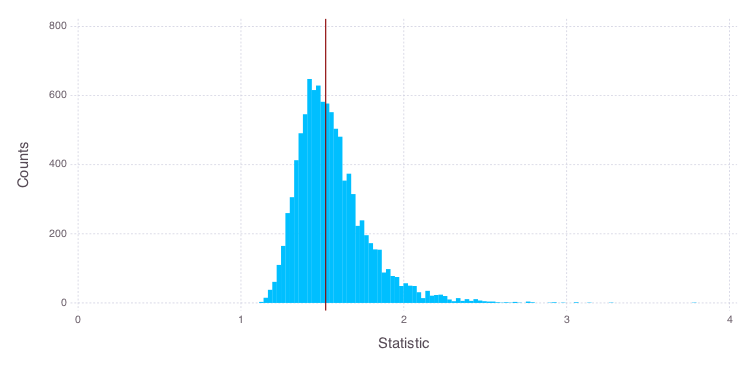

In [16]:
p = plot(
    layer(xintercept = [original(bs1)[1]], Geom.vline(color = colorant"darkred")),
    layer(x = straps(bs1)[1], Geom.histogram(bincount = 100)),
    Guide.xlabel("Statistic"), Guide.ylabel("Counts")
    )
draw(PNG(20cm, 10cm), p)